In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((200,), (200, 2))

In [4]:
y=y.reshape(200,1)

# Computing the Cost Function
Fill in the the `compute_cost` function below:

In [5]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    """ 
    e=y-np.dot(tx,w)
    R=np.linalg.norm(e)**2/(2*len(y))
    """
    # ***************************************************
    # TODO: compute loss by MAE
    #"""
    e=y-np.dot(tx,w)
    R=(sum(abs(e))/len(y))[0]
    #"""
    # ***************************************************
    return R
    
w=np.array([[1],[2]])
print(compute_loss(y, tx, w))

72.6322724597


# Grid Search

Fill in the function `grid_search()` below:

In [6]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    for i in np.arange(len(w0)):
        for j in np.arange(len(w1)):
            a=np.array([[w0[i]],[w1[j]]])
            losses[i,j]=compute_loss(y,tx,a)

    # ***************************************************
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=7.5303590702907295, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.061 seconds


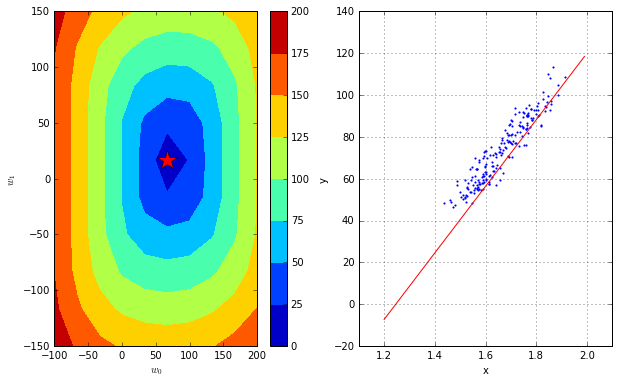

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization
import datetime

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [8]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    e=y-np.dot(tx,w)
    gr=-np.dot(np.transpose(tx),e)/(len(y))
    return gr
    # ***************************************************

In [9]:
z=np.array([[100],[20]])
print(compute_gradient(y,tx,z))
z=np.array([[50],[10]])
print(compute_gradient(y,tx,z))


[[ 26.36772754]
 [  5.52429512]]
[[-23.63227246]
 [ -4.47570488]]


Please fill in the functions `gradient_descent` below:

In [10]:
def gradient_descent(y, tx, initial_w, max_iters, gamma): 
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        G=compute_gradient(y,tx,w)
        loss=compute_loss(y,tx, w)
        # ***************************************************
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        w=w-gamma*G
        # ***************************************************
    
        # store w and loss
        ws.append(np.copy(w))
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [11]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4

# Initialization
w_initial = np.array([[0.0], [0.0]])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=73.6322724597311, w0=[ 29.45290898], w1=[ 5.79028195]
Gradient Descent(1/49): loss=44.179363475838684, w0=[ 47.12465437], w1=[ 9.26445112]
Gradient Descent(2/49): loss=26.507618085503236, w0=[ 57.72770161], w1=[ 11.34895262]
Gradient Descent(3/49): loss=15.90457085130191, w0=[ 64.08952995], w1=[ 12.59965352]
Gradient Descent(4/49): loss=9.664665433720856, w0=[ 67.90662695], w1=[ 13.35007407]
Gradient Descent(5/49): loss=6.41573744120762, w0=[ 70.19688516], w1=[ 13.80032639]
Gradient Descent(6/49): loss=5.012825710282189, w0=[ 71.57104008], w1=[ 14.07047778]
Gradient Descent(7/49): loss=4.478970644912215, w0=[ 72.39553303], w1=[ 14.23256862]
Gradient Descent(8/49): loss=4.286198549604318, w0=[ 72.8902288], w1=[ 14.32982312]
Gradient Descent(9/49): loss=4.2350955775965256, w0=[ 73.18704627], w1=[ 14.38817582]
Gradient Descent(10/49): loss=4.216291354276794, w0=[ 73.36513674], w1=[ 14.42318745]
Gradient Descent(11/49): loss=4.212840391359388, w0=[ 73.47199103]

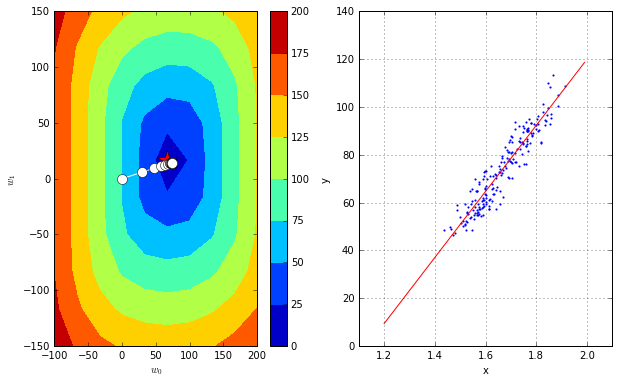

In [12]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# Stochastic gradient descent

In [18]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient for batch data."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.
    return compute_gradient(y,tx,w)
    # ***************************************************


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_epochs, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    ws = [initial_w]
    losses = []
    w = initial_w;
    i=0
    for n_iter in range(max_epochs):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            print(i)
            i=i+1
            grad= compute_gradient(minibatch_y, minibatch_tx, w)
            w=w-gamma*grad
        
        ws.append(np.copy(w))
        loss=compute_loss(y,tx,w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
        bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
      
    # ***************************************************
    
    return losses, ws

In [19]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4
batch_size = 1

# Initialization
w_initial = np.array([[0.0], [0.0]])

# Start SGD.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))


0
Gradient Descent(0/49): loss=37.16358976364416, w0=[ 36.4686827], w1=[ 30.17710582]
1
Gradient Descent(0/49): loss=24.2969660445398, w0=[ 50.62127423], w1=[ 30.43731589]
2
Gradient Descent(0/49): loss=28.081647431718842, w0=[ 45.55062503], w1=[ 21.30167661]
3
Gradient Descent(0/49): loss=26.417022217198408, w0=[ 64.09598778], w1=[-15.18098581]
4
Gradient Descent(0/49): loss=23.91872174933484, w0=[ 60.22526436], w1=[-11.1972414]
5
Gradient Descent(0/49): loss=20.364706950037686, w0=[ 68.46124588], w1=[-8.33334761]
6
Gradient Descent(0/49): loss=18.219711915421275, w0=[ 62.29011094], w1=[-4.26760016]
7
Gradient Descent(0/49): loss=18.20449355582073, w0=[ 61.28898923], w1=[-3.83199224]
8
Gradient Descent(0/49): loss=18.817261285407017, w0=[ 63.64316063], w1=[-5.55095151]
9
Gradient Descent(0/49): loss=18.48793966160137, w0=[ 68.02129671], w1=[-5.98879335]
10
Gradient Descent(0/49): loss=15.049864235924753, w0=[ 62.41735103], w1=[ 0.30424085]
11
Gradient Descent(0/49): loss=10.4578989270

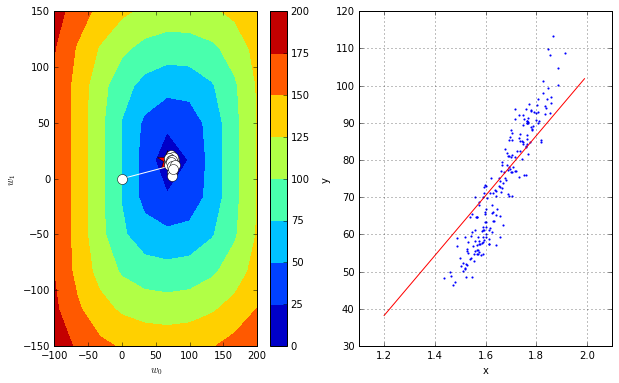

In [17]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
   
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))